<a href="https://colab.research.google.com/github/anjumkhan872/Project-Foundations-for-Data-Science-FoodHub-Data-Analysis/blob/main/Anjum_project2_USL_Fullcode__Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [ ]:
# Importing all the necessary packages
!pip install scikit-learn-extra
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00


### **Loading the data**

In [ ]:
data = pd.read_excel('/content/Credit+Card+Customer+Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


1.RangeIndex: 660 entries, 0 to 659: This indicates that the DataFrame has a total of 660 rows, and the index ranges from 0 to 659.
2.Data columns (total 7 columns): This specifies that the DataFrame contains a total of 7 columns.
3.Each column has 660 entries with no missing values, and all columns are of integer type (int64). This indicates a well-structured dataset with consistent data types across all columns.

In [ ]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

The Customer Key column has 655 unique values. Since the total number of rows is 660, this indicates that there are some duplicate values in this column (660 rows minus 655 unique values implies 5 duplicates).
The output tells us that the Sl_No column is likely a unique identifier since it has 660 unique values for 660 rows. The Customer Key column, while mostly unique, has a few duplicates. The other columns have a varying range of unique values, reflecting the diversity of the data in those columns.

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

Droping the rows with duplicate customer keys

In [ ]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'][data['Customer Key'].duplicated()] # Complete the code
data[data['Customer Key'].isin(duplicate_keys)]



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


The output displays rows with duplicate 'Customer Key' values, indicating variations in customer attributes such as average credit limit, total credit cards, and visit/call counts within the dataset. This suggests potential inconsistencies or updates in the data over time.

In [ ]:
data = data.drop_duplicates(subset='Customer Key')


After executing this code, the DataFrame data will contain only unique 'Customer Key' values, with any duplicate rows removed.

**Dropping columns **

In [ ]:
data.drop(columns=['Sl_No'], inplace=True)

Checking duplicate rows

In [ ]:
data[data.duplicated()]


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [ ]:
data = data[~data.duplicated()]

In [ ]:
data.shape

(655, 6)

**Observations:___________**
data[data.duplicated()]: This line filters the DataFrame data to include only rows that are duplicates across all columns.

data = data[~data.duplicated()]: This line removes the duplicate rows from the DataFrame data. The ~ operator negates the boolean Series returned by data.duplicated(), effectively selecting rows that are not duplicates.

data.shape: Finally, this line retrieves the updated dimensions of the DataFrame data, providing the number of rows and columns after removing duplicates.

In summary, the code removes duplicate rows from the DataFrame data and then displays the updated shape of the DataFrame.

(655, 6) signifies that the DataFrame data now contains 655 unique rows and 6 columns after removing duplicate rows.

#### **Check the summary Statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


Customer Key: Describes unique customer identifiers, with a range from 11265 to 99843.
Avg_Credit_Limit: Represents the average credit limit for customers, with values ranging from 3000 to 200000.
Total_Credit_Cards: Indicates the total number of credit cards held by customers, ranging from 1 to 10.
Total_visits_bank: Represents the total number of visits to the bank by customers, ranging from 0 to 5.
Total_visits_online: Describes the total number of online visits by customers, ranging from 0 to 15.
Total_calls_made: Indicates the total number of calls made by customers, with values ranging from 0 to 10.
These statistics offer insights into the central tendency, dispersion, and range of values for each variable, facilitating a better understanding of the dataset's characteristics.








Customer Key
Skew: 0.05


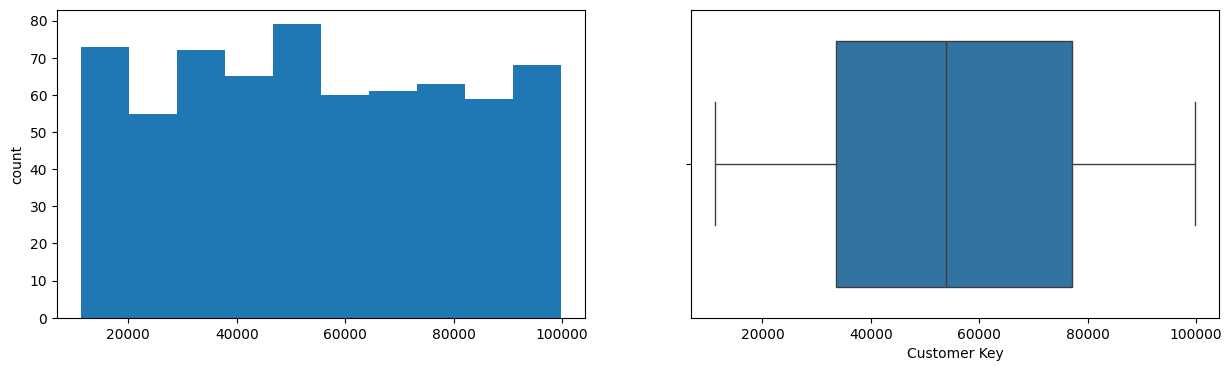

Avg_Credit_Limit
Skew: 2.21


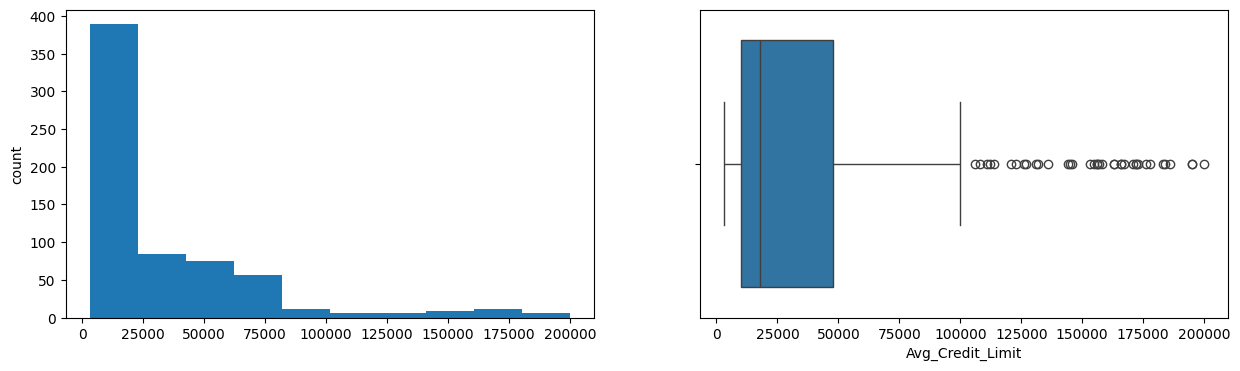

Total_Credit_Cards
Skew: 0.16


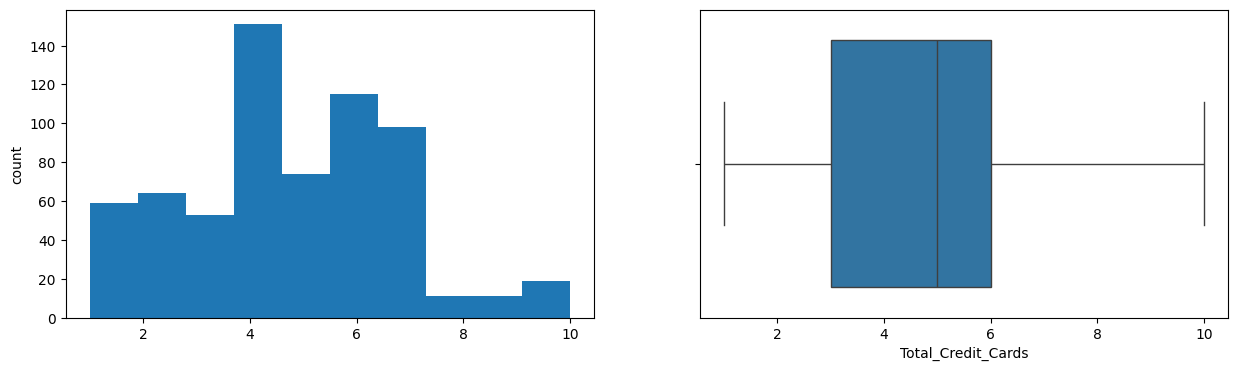

Total_visits_bank
Skew: 0.14


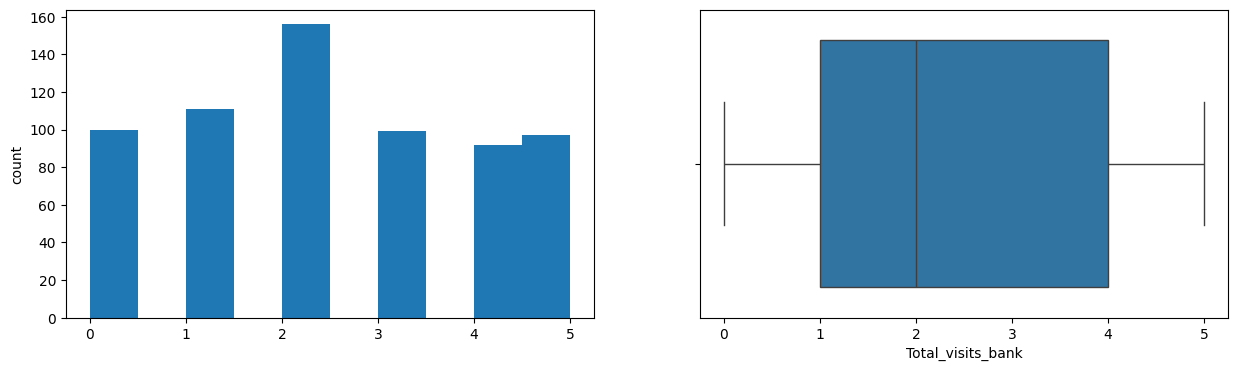

Total_visits_online
Skew: 2.23


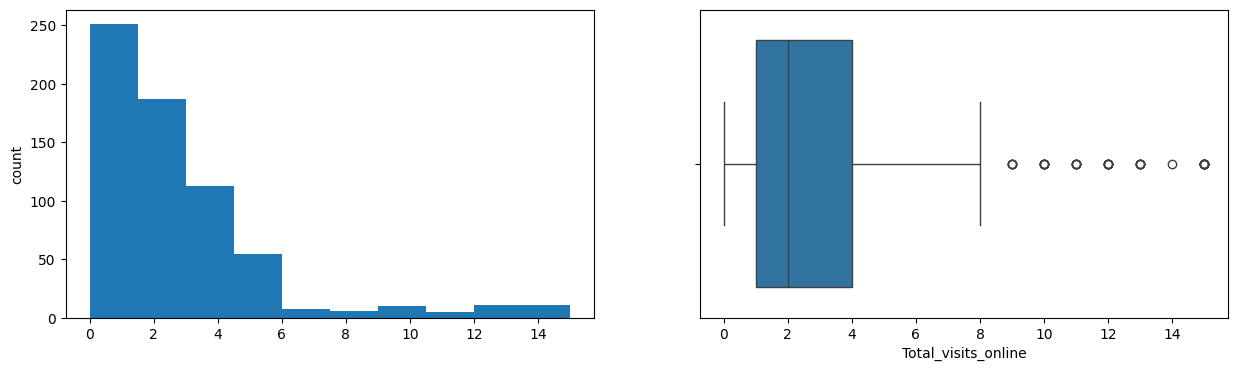

Total_calls_made
Skew: 0.65


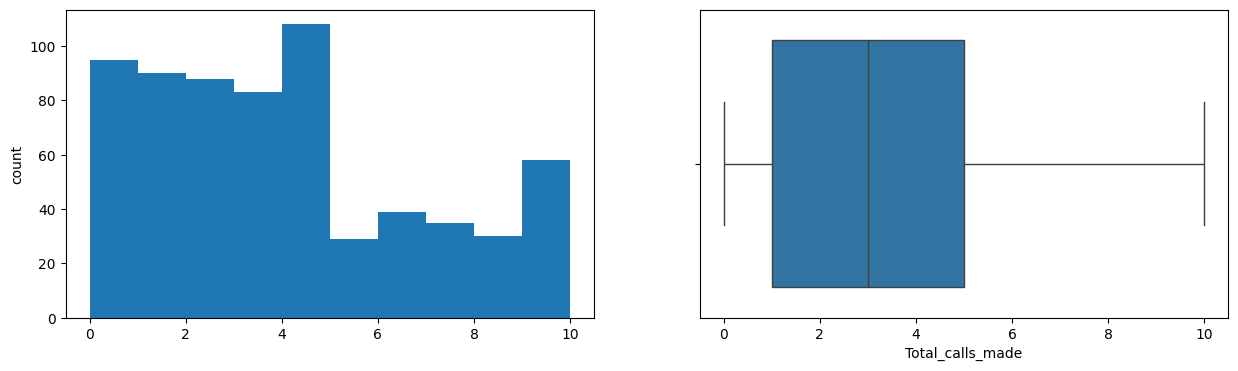

In [ ]:
for col in data.columns:
    print(col)
    print('Skew:', round(data[col].skew(), 2))

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    data[col].plot.hist()
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])

    plt.show()

**1.Customer Key** skewness value of 0.05 indicates that the distribution of "Customer Key" is nearly symmetrical.
**2.Avg_Credit_Limit:**The skewness value of 2.21 indicates that the distribution of average credit limits is moderately right-skewed. This means that there is a longer tail to the right, with more values extending towards higher credit limits.
**3.Total_Credit_Cards:**The skewness value of 0.16 indicates that the distribution of total credit cards is nearly symmetrical. There is very little skewness observed in this variable.
**4.Total_visits_bank:**The skewness value of 0.14 indicates that the distribution of total visits to the bank is nearly symmetrical. Similar to total credit cards, there is very little skewness observed in this variable.
**5.Total_visits_online:**The skewness value of 2.23 indicates that the distribution of total online visits is moderately right-skewed. There is a longer tail to the right, with more values extending towards higher online visit counts.
**6.Total_calls_made:**he skewness value of 0.65 indicates that the distribution of total calls made is moderately right-skewed. There is a longer tail to the right, indicating more values with higher numbers of calls made.

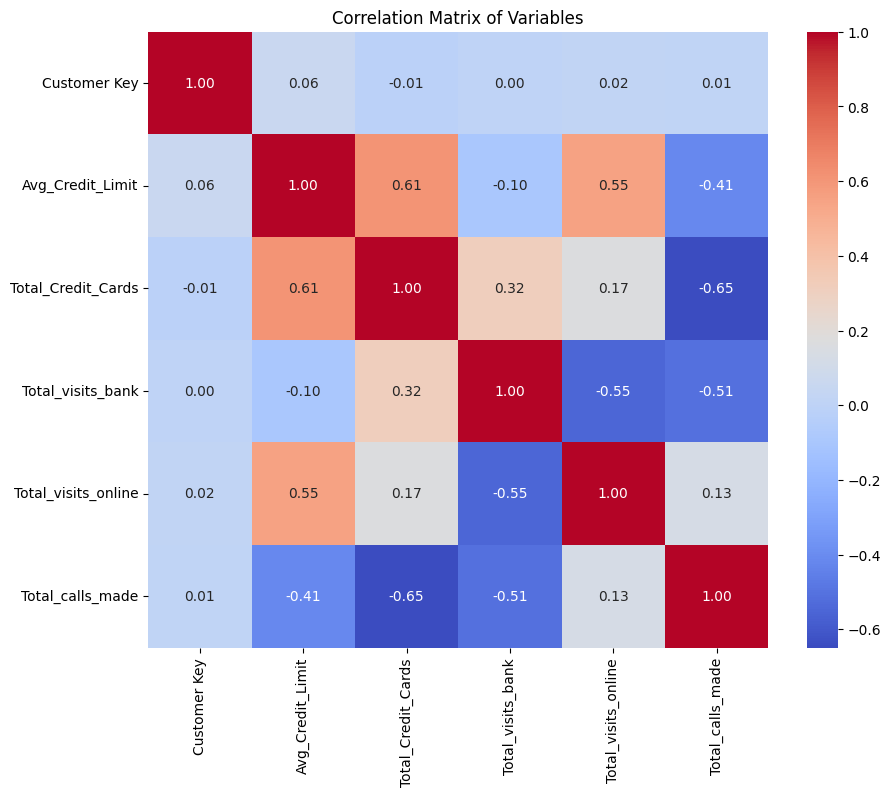

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Variables')
plt.show()

The correlation analysis reveals that there are some intuitive relationships between the variables:

There is a positive correlation between "Avg_Credit_Limit" and "Total_Credit_Cards", as well as between "Avg_Credit_Limit" and "Total_visits_online", which is logical.
Conversely, "Avg_Credit_Limit" shows a negative correlation with "Total_calls_made" and "Total_visits_bank".
Additionally, "Total_visits_bank", "Total_visits_online", and "Total_calls_made" are negatively correlated, indicating that most customers tend to use only one of these channels to interact with the bank.

#### **Scaling the data**

In [ ]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = scaler.fit_transform(data)

This code initializes the scaler and then uses it to transform the data in one step. There's no need to initialize the scaler separately for fitting and transforming the data.

#### **Applying PCA on scaled data**

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components equal to the number of features
pca = PCA(n_components=data.shape[1])

# Fit and transform the scaled data using PCA
principal_components = pca.fit_transform(data_scaled)

# Save the principal components to a DataFrame with original column names
data_pca = pd.DataFrame(principal_components, columns=data.columns)



This code ensures that the number of components for PCA is set to the number of features in the dataset (data.shape[1]), and it then fits and transforms the scaled data using PCA. Finally, it saves the principal components to a DataFrame data_pca, where each component is represented by a column with the original column names from the dataset.

In [ ]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

This line of code creates a deep copy of the DataFrame data_pca and assigns it to the variable data_copy. The purpose of this code is to preserve the original principal components data in data_pca while creating a separate copy data_copy where you can store labels or results from different algorithms or processes without modifying the original data.

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

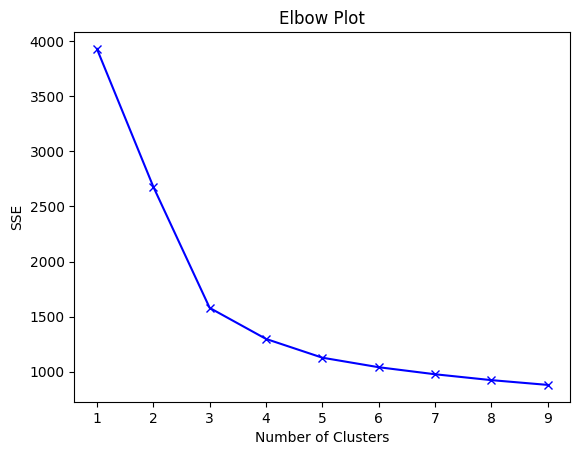

In [ ]:
# Initialize a dictionary to store SSE for each K
sse = {}

# Iterate over a range of Ks and fit the PCA components to the algorithm
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_pca)
    # Use inertia attribute from the clustering object and store the inertia value for that K
    sse[k] = kmeans.inertia_

# Plot SSE for each number of clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Plot")
plt.show()


This code initializes a dictionary sse to store the Sum of Squared Error (SSE) for each value of K. Then, it iterates over a range of K values, fits the PCA components to the KMeans clustering algorithm for each value of K, computes the inertia (SSE), and stores it in the dictionary. Finally, it plots the SSE for each number of clusters.

In [ ]:
# Apply the K-Means algorithm
desired_number_of_clusters = 3
kmeans = KMeans(n_clusters=desired_number_of_clusters, random_state=1)

# Fit the kmeans function on the pca components
kmeans.fit(data_pca)

# Adding predicted labels to the original data and the copied data

# Save the predictions on the pca components from K-Means
data_copy['Labels'] = kmeans.labels_
data['Labels'] = kmeans.labels_


We initialize the KMeans algorithm with the desired number of clusters.
Then, we fit the KMeans algorithm to the PCA components.
Finally, we add the predicted labels from KMeans to both the original data (data) and the copied data (data_copy) by assigning the labels_ attribute from the fitted KMeans model to the 'Labels' column in each DataFrame.

#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [ ]:
# Number of observations in each cluster
data.Labels.value_counts()

Labels
1    382
0    224
2     49
Name: count, dtype: int64

Labels: This column represents the cluster labels assigned to each data point.
Count: The number of data points assigned to each cluster. For example:
Cluster 1 contains 382 data points.
Cluster 0 contains 224 data points.
Cluster 2 contains 49 data points.
These counts indicate how the data points are distributed among the clusters identified by the K-Means algorithm.

In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T


,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Customer Key,55239.830357,54847.824607,55867.408163,55235.5,53084.0,53834.0
Avg_Credit_Limit,12174.107143,33604.712042,140102.040816,12000.0,31000.0,145000.0
Total_Credit_Cards,2.410714,5.505236,8.775510,2.0,6.0,9.0
Total_visits_bank,0.933036,3.494764,0.591837,1.0,3.0,1.0
Total_visits_online,3.553571,0.976440,10.979592,4.0,1.0,11.0
Total_calls_made,6.870536,2.005236,1.102041,7.0,2.0,1.0


The output presents summary statistics of the original data for each cluster identified by the K-Means algorithm, including the mean and median values.

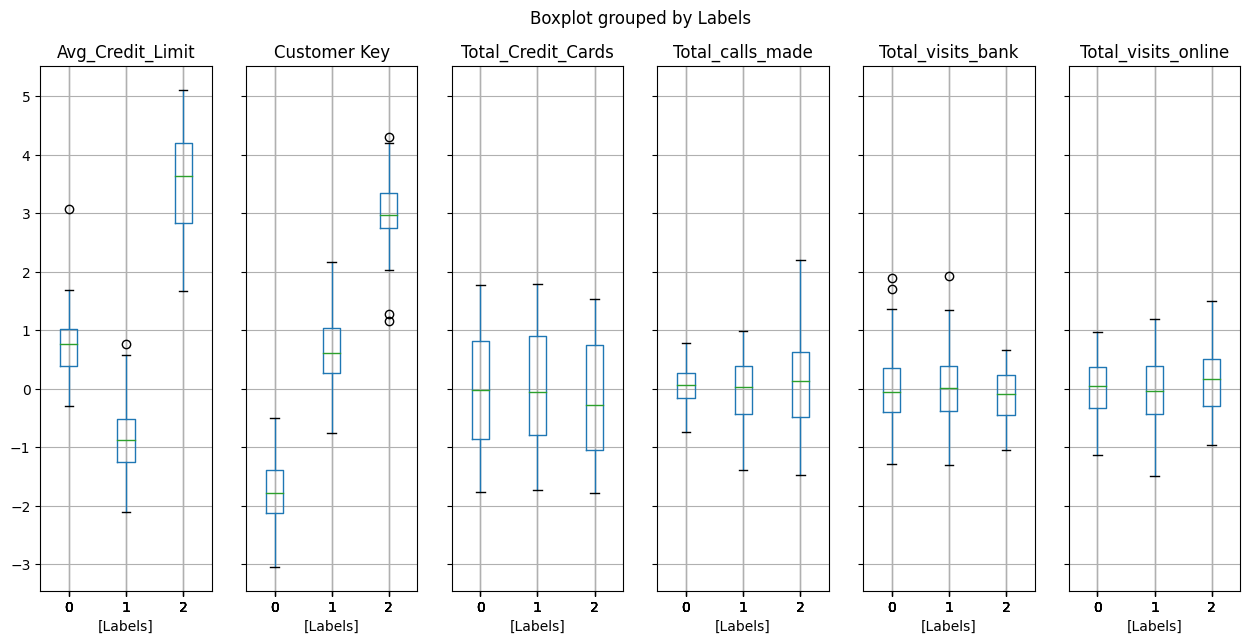

In [ ]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 6), figsize = (15, 7))

plt.show()

**Cluster Profiles:_______________**

The output is a set of boxplots visualizing the distribution of different features with respect to the K-means cluster labels. Each subplot represents a feature, and within each subplot, the boxplots are grouped by the cluster labels.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [ ]:
# Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1
gmm = GaussianMixture(n_components=3, random_state=1) # Complete the code


# Fit the model on the pca components
gmm.fit(data_pca)
# Complete the code

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

We initialize a Gaussian Mixture Model with n_components=3 to specify the number of clusters and random_state=1 to ensure reproducibility.
Then, we fit the GMM model to the PCA components using the fit() method.
Finally, we predict cluster labels for the data points based on GMM clustering and assign them to the 'GmmLabels' column in both data_copy and data DataFrames.

In [ ]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

GmmLabels
1    382
0    224
2     49
Name: count, dtype: int64

GmmLabels: This column represents the cluster labels assigned to each data point.
Count: The number of data points assigned to each cluster. For example:
Cluster 1 contains 382 data points.
Cluster 0 contains 224 data points.
Cluster 2 contains 49 data points.
These counts indicate how the data points are distributed among the clusters identified by the Gaussian Mixture Model (GMM).

#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [ ]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T


,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12174.107143,33604.712042,140102.040816,12000.0,31000.0,145000.0
Total_Credit_Cards,2.410714,5.505236,8.775510,2.0,6.0,9.0
Total_visits_bank,0.933036,3.494764,0.591837,1.0,3.0,1.0
Total_visits_online,3.553571,0.976440,10.979592,4.0,1.0,11.0
Total_calls_made,6.870536,2.005236,1.102041,7.0,2.0,1.0


#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [ ]:
# Compare the clusters from K-means and GMM
kmeans_clusters = data.groupby('Labels').mean()
gmm_clusters = data.groupby('GmmLabels').mean()

# Concatenate the cluster centroids for comparison
comparison = pd.concat([kmeans_clusters, gmm_clusters], axis=1)
#comparison.columns = ['KMeans_Group_0', 'KMeans_Group_1', 'KMeans_Group_2', 'GMM_Group_0', 'GMM_Group_1', 'GMM_Group_2']

# Display the comparison
print(comparison)



   Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0  55239.830357      12174.107143            2.410714           0.933036   
1  54847.824607      33604.712042            5.505236           3.494764   
2  55867.408163     140102.040816            8.775510           0.591837   

   Total_visits_online  Total_calls_made  GmmLabels  Customer Key  \
0             3.553571          6.870536        0.0  55239.830357   
1             0.976440          2.005236        1.0  54847.824607   
2            10.979592          1.102041        2.0  55867.408163   

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0      12174.107143            2.410714           0.933036   
1      33604.712042            5.505236           3.494764   
2     140102.040816            8.775510           0.591837   

   Total_visits_online  Total_calls_made  Labels  
0             3.553571          6.870536     0.0  
1             0.976440          2.005236     1.0  
2            10.

**Comparing Clusters:____________**
This output provides a comparison of the cluster centroids (mean values) for each feature between the clusters identified by the Gaussian Mixture Model (GMM) and the clusters identified by the K-means algorithm. Here's a brief explanation:

For each cluster (0, 1, 2), it shows the mean values of features such as 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', and 'Total_calls_made'. The columns labeled with suffix '_0' correspond to Cluster 0, '_1' to Cluster 1, and '_2' to Cluster 2. The rows labeled with 'GmmLabels' represent the mean values for each feature in the clusters identified by the Gaussian Mixture Model. The rows labeled with 'Labels' represent the mean values for each feature in the clusters identified by the K-means algorithm. This comparison allows us to observe how similar or different the cluster centroids are between the two clustering algorithms.



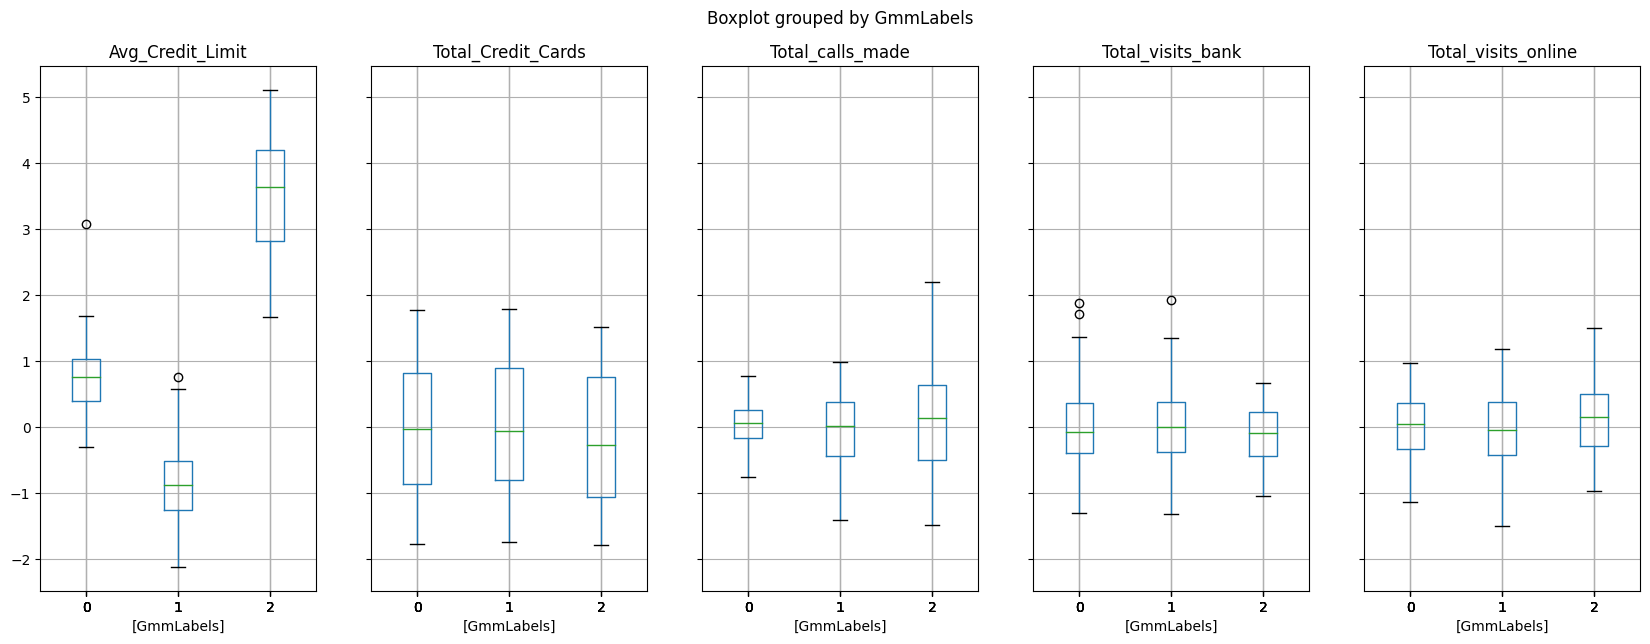

In [ ]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [ ]:
# Initialize K-Medoids with desired number of clusters
kmedo = KMedoids(n_clusters=3, random_state=1)  # Complete the code

# Fit the model on the pca components
kmedo.fit(data_pca)  # Complete the code

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

we initialize K-Medoids with n_clusters=3 to specify the number of clusters and random_state=1 for reproducibility.
Next, we fit the K-Medoids model to the PCA components using the fit() method.
Finally, we obtain the cluster labels assigned by K-Medoids using the labels_ attribute.

In [ ]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

kmedoLabels
2    247
1    219
0    189
Name: count, dtype: int64

he code data.kmedoLabels.value_counts() computes the count of data points assigned to each cluster label by the K-Medoids clustering algorithm.

#### **Create cluster profiles using the summary statistics and box plots for each label**

We calculate the mean and median of the original data grouped by the labels assigned by the K-Medoids clustering algorithm.
Then, we concatenate the mean and median statistics vertically using pd.concat() along the rows (axis=0).
We rename the index for clarity to differentiate between mean and median statistics for each group.
Finally, we transpose the DataFrame for better readability, swapping rows and columns, and select only the original features for analysis.

In [ ]:
# Calculate summary statistics of the original data for each label
summary_stats_mean = data.groupby('kmedoLabels').mean()
summary_stats_median = data.groupby('kmedoLabels').median()

# Concatenate mean and median statistics vertically
df_kmedoids = pd.concat([summary_stats_mean, summary_stats_median], axis=0)

# Rename the index for clarity
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

# Transpose the DataFrame for better readability and select original features
df_kmedoids[original_features].T


,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,63978.835979,12159.817352,31068.825911,52000.0,12000.0,27000.0
Total_Credit_Cards,6.312169,2.378995,5.502024,6.0,2.0,6.0
Total_visits_bank,1.820106,0.922374,4.157895,2.0,1.0,4.0
Total_visits_online,3.730159,3.579909,0.882591,2.0,4.0,1.0
Total_calls_made,1.878307,6.949772,1.951417,2.0,7.0,2.0


comparison helps in understanding the characteristics of each cluster group identified by the K-Medoids algorithm in terms of the original features.

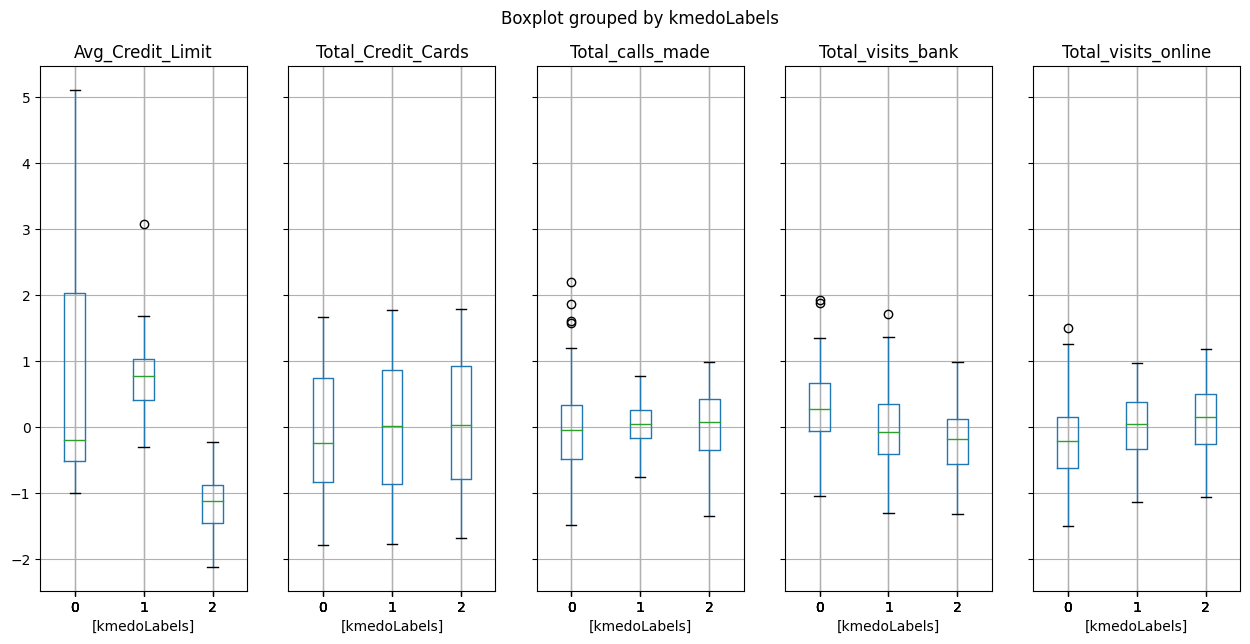

In [ ]:
# Select features including the K-Medoids labels
features_with_labels = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

# Plot boxplots by K-Medoids labels
data_copy[features_with_labels].boxplot(by='kmedoLabels', layout=(1, 5), figsize=(15, 7))

# Display the plot
plt.show()


We specify the features to include in the boxplots, including the 'kmedoLabels' column.
Then, we plot boxplots grouped by the 'kmedoLabels' column using the boxplot() method.
The layout parameter specifies the layout of the subplots.
Finally, we display the plot using plt.show().

**Cluster Profiles:____________**
Cluster Profiles for the K-Medoids clustering algorithm based on the provided boxplots:

Cluster 0: This cluster tends to have a higher average credit limit, higher total credit cards, and a moderate number of visits to the bank and online visits. They make fewer calls to the bank compared to other clusters.

Cluster 1: This cluster has the lowest average credit limit and total credit cards. They tend to make the highest number of calls to the bank but have the lowest number of visits to the bank and online visits.

Cluster 2: This cluster has a moderate average credit limit and total credit cards. They have a relatively higher number of visits to the bank compared to other clusters and make a moderate number of calls to the bank.

These profiles provide insights into the characteristics of each cluster identified by the K-Medoids algorithm based on the provided features.

#### **Compare the clusters from K-Means and K-Medoids**

In [ ]:
# Concatenate the summary statistics of K-Medoids and K-Means clusters
comparison = pd.concat([df_kmedoids[original_features], df_kmeans[original_features]], axis=1)

# Display the comparison
comparison


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group_0 Mean,63978.835979,6.312169,1.820106,3.730159,1.878307,12174.107143,2.410714,0.933036,3.553571,6.870536
group_1 Mean,12159.817352,2.378995,0.922374,3.579909,6.949772,33604.712042,5.505236,3.494764,0.976440,2.005236
group_2 Mean,31068.825911,5.502024,4.157895,0.882591,1.951417,140102.040816,8.775510,0.591837,10.979592,1.102041
group_0 Median,52000.000000,6.000000,2.000000,2.000000,2.000000,12000.000000,2.000000,1.000000,4.000000,7.000000
group_1 Median,12000.000000,2.000000,1.000000,4.000000,7.000000,31000.000000,6.000000,3.000000,1.000000,2.000000
group_2 Median,27000.000000,6.000000,4.000000,1.000000,2.000000,145000.000000,9.000000,1.000000,11.000000,1.000000


**Comparing Clusters:___________________**
This output presents a comparison between the mean and median values of original features for each cluster group identified by both K-Medoids and K-Means clustering algorithms. Each row corresponds to a statistical summary (mean or median) for each feature across different cluster groups.
This comparison helps in understanding how the cluster groups differ in terms of their average and median values for each feature across both clustering algorithms.

## **Conclusions and Business Recommendations**
**we can draw several conclusions and provide business recommendations for AllLife Bank like
1.Customer Segmentation: The clustering algorithms identified distinct segments within the customer base based on their spending patterns and interactions with the bank. These segments can be used to tailor marketing strategies and service offerings to specific customer groups, improving customer satisfaction and retention
2.Segment Characteristics:
Cluster Profiles: Each cluster exhibits unique characteristics in terms of average credit limit, total credit cards, bank visits, online visits, and calls made.
Segment Preferences: Understanding these characteristics can help AllLife Bank prioritize resources and design personalized campaigns that resonate with the preferences and behaviors of each segment.
3.Targeted Marketing:Personalized Campaigns: Leveraging the insights from customer segmentation, AllLife Bank can create targeted marketing campaigns aimed at acquiring new customers and upselling to existing ones.
Channel Preferences: Tailoring marketing messages and promotions to match the preferred channels of interaction for each segment (e.g., online, bank visits, calls) can improve campaign effectiveness.
4.Service Enhancement:Improving Customer Support: Addressing the perceived poor support services identified by customers is crucial. AllLife Bank can focus on enhancing its service delivery model to ensure faster resolution of customer queries and complaints.
Efficient Communication: Understanding the preferred communication channels of each segment can help optimize customer support operations and streamline communication channels for better responsiveness.
5.Future Research:Continuous Monitoring: Customer preferences and behaviors may evolve over time. It's essential for AllLife Bank to continuously monitor customer data and adapt its strategies accordingly to stay relevant in a dynamic market environment.
Feedback Mechanisms: Implementing feedback mechanisms to gather insights directly from customers can provide valuable information for refining products, services, and customer experiences.


In conclusion, leveraging the power of unsupervised learning techniques such as clustering can help AllLife Bank gain valuable insights into its customer base, enabling targeted marketing efforts, service enhancements, and overall business growth. By understanding the diverse needs and preferences of its customers, AllLife Bank can strengthen its competitive position and foster long-term relationships with its clientele.
